In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('C:/Users/Ramapriya Murugesan/Desktop/capstone Project/batting_summary.csv')
df2 = pd.read_csv('C:/Users/Ramapriya Murugesan/Desktop/capstone Project/bowling_summary.csv')
df3 = pd.read_csv('C:/Users/Ramapriya Murugesan/Desktop/capstone Project/match_data.csv')
df4 = pd.read_csv('C:/Users/Ramapriya Murugesan/Desktop/capstone Project/players_information_with_image.csv')

In [3]:
df1.head()
df2.head()
df3.head()
df4.head()

,name,team,image,battingStyle,bowlingStyle,playingRole,description
0,Najmul Hossain Shanto,Bangladesh,NaN,Left hand Bat,Right arm Offbreak,Top order Batter,Nazmul Hossain Shanto emerged from an unusual ...
1,Soumya Sarkar,Bangladesh,NaN,Left hand Bat,Right arm Medium fast,Middle order Batter,"A rarity among Bangladesh allrounders, top-ord..."
2,Litton Das,Bangladesh,NaN,Right hand Bat,NaN,Wicketkeeper Batter,Liton Das is the first wicketkeeper-batsman in...
3,Shakib Al Hasan(c),Bangladesh,NaN,Left hand Bat,Slow Left arm Orthodox,Allrounder,When the annals of Bangladesh cricket are sift...
4,Afif Hossain,Bangladesh,NaN,Left hand Bat,Right arm Offbreak,Allrounder,Bangladesh left-hander Afif Hossain made his T...


In [6]:
df1.info()
df2.info()
df3.info()
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   match        699 non-null    object
 1   teamInnings  699 non-null    object
 2   battingPos   699 non-null    int64 
 3   batsmanName  699 non-null    object
 4   runs         699 non-null    int64 
 5   balls        699 non-null    int64 
 6   4s           699 non-null    int64 
 7   6s           699 non-null    int64 
 8   SR           699 non-null    object
 9   Out/Not_Out  699 non-null    object
 10  matchID      699 non-null    object
dtypes: int64(5), object(6)
memory usage: 60.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   match        500 non-null    object 
 1   bowlingTeam  500 non-null    object 
 2   bowlerName   500 non-null    obje

In [7]:
df1.isnull().sum()
df2.isnull().sum()
df3.isnull().sum()
df4.isnull().sum()

name              0
team              0
image           188
battingStyle      0
bowlingStyle     20
playingRole       0
description      70
dtype: int64

In [8]:
df1.duplicated()
df2.duplicated()
df3.duplicated()
df4.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
214    False
215    False
216    False
217    False
218    False
Length: 219, dtype: bool

In [9]:
df1.shape
df2.shape
df3.shape
df4.shape

(219, 7)

In [11]:
# Remove duplicate
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)
df3.drop_duplicates(inplace=True)
df4.drop_duplicates(inplace=True)

In [12]:
# Handle missing value(fill or drop)
df1.fillna(0,inplace=True)
df2.fillna(0,inplace=True)
df1.fillna("Unknown",inplace=True)
df1.fillna("Unknown",inplace=True)

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   match        699 non-null    object
 1   teamInnings  699 non-null    object
 2   battingPos   699 non-null    int64 
 3   batsmanName  699 non-null    object
 4   runs         699 non-null    int64 
 5   balls        699 non-null    int64 
 6   4s           699 non-null    int64 
 7   6s           699 non-null    int64 
 8   SR           699 non-null    object
 9   Out/Not_Out  699 non-null    object
 10  matchID      699 non-null    object
dtypes: int64(5), object(6)
memory usage: 60.2+ KB


In [15]:
df1.columns

Index(['match', 'teamInnings', 'battingPos', 'batsmanName', 'runs', 'balls',
       '4s', '6s', 'SR', 'Out/Not_Out', 'matchID'],
      dtype='object')

In [35]:
top_batters = df1.groupby("batsmanName")["runs"].sum().sort_values(ascending=False).head(5)

In [16]:
df2.columns

Index(['match', 'bowlingTeam', 'bowlerName', 'overs', 'maiden', 'runs',
       'wickets', 'economy', '0s', '4s', '6s', 'wides', 'noBalls', 'matchID'],
      dtype='object')

In [49]:
top_bowlers=df2.groupby("bowlerName")["wickets"].sum().sort_values(ascending=False).head(5)

In [53]:
df3.columns

Index(['team1', 'team2', 'winner', 'margin', 'ground', 'matchDate', 'matchID'], dtype='object')

In [91]:
team_wins=df3.groupby("team1")["winner"].sum().sort_values(ascending=False).head(10)

In [72]:
df4.columns

Index(['name', 'team', 'image', 'battingStyle', 'bowlingStyle', 'playingRole',
       'description', 'rating'],
      dtype='object')

# TOP 5 run Scores

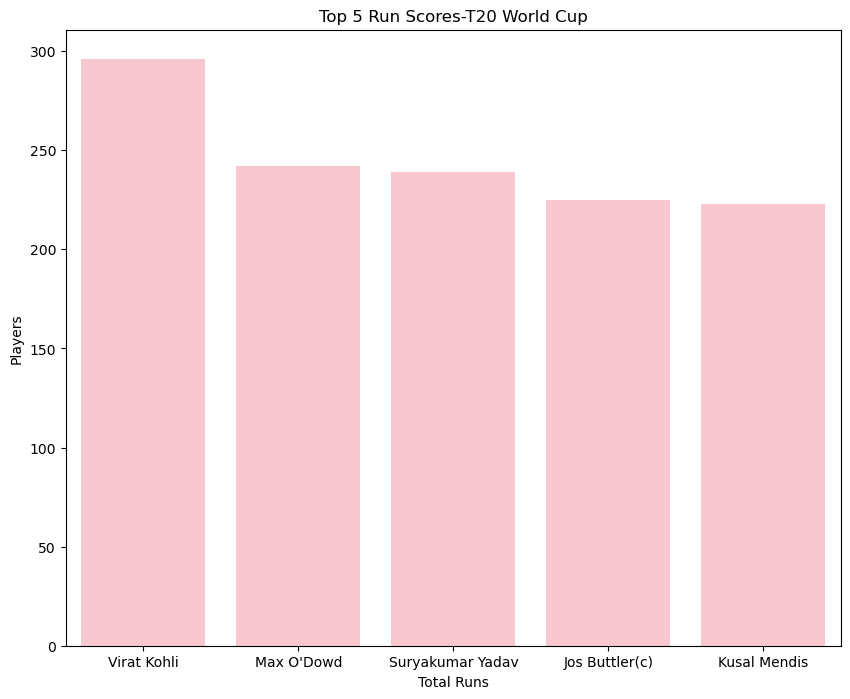

In [39]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_batters.index,y=top_batters.values,color="pink")
plt.title('Top 5 Run Scores-T20 World Cup')
plt.xlabel('Total Runs')
plt.ylabel('Players')
plt.show()

# TOP 5 wicket_takers

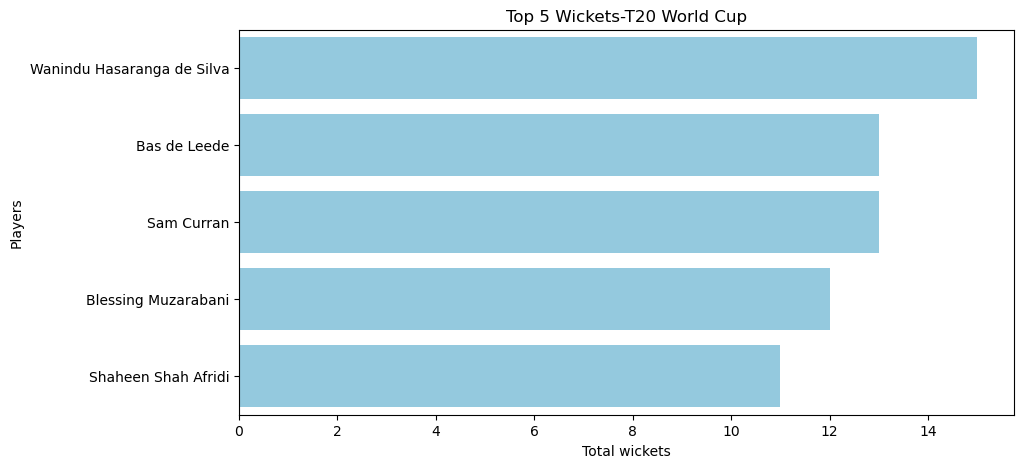

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_bowlers.values,y=top_bowlers.index,color="skyblue")
plt.title('Top 5 Wickets-T20 World Cup')
plt.xlabel('Total wickets')
plt.ylabel('Players')
plt.show()

# Team wins over matches

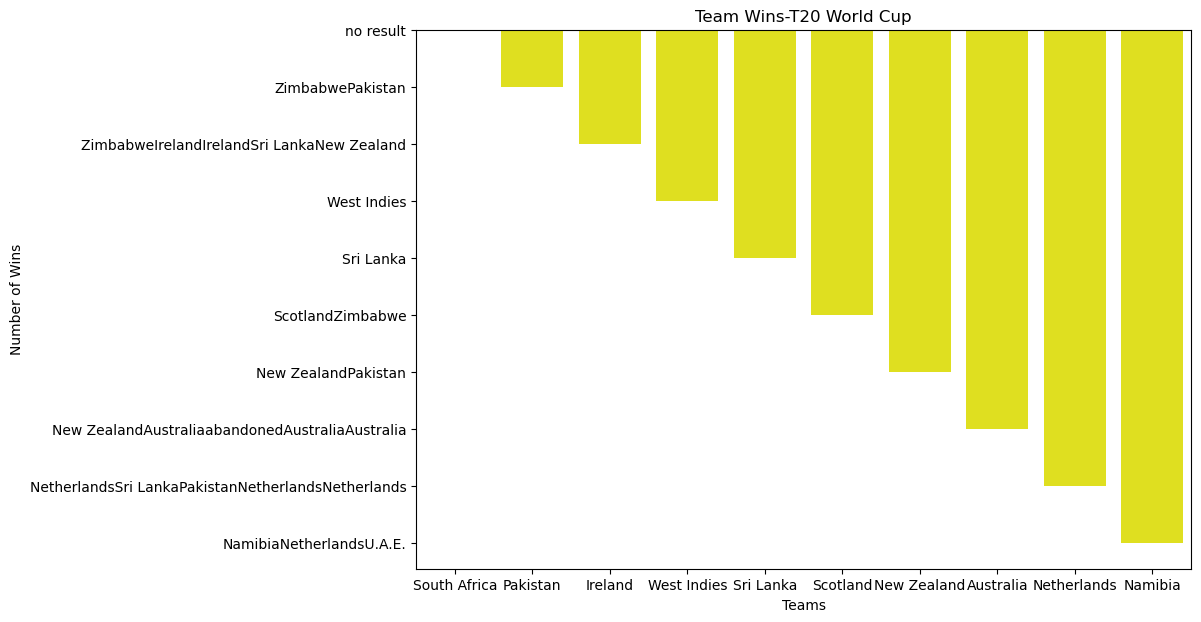

In [66]:
plt.figure(figsize=(10,7))
sns.barplot(x=team_wins.index,y=team_wins.values,color="yellow")
plt.title('Team Wins-T20 World Cup')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.show()           
           

# Distribution of player ratings(if available in player dataset)

In [98]:
import numpy as np
df4['rating'] = np.random.randint(1,11,df4.shape[0])

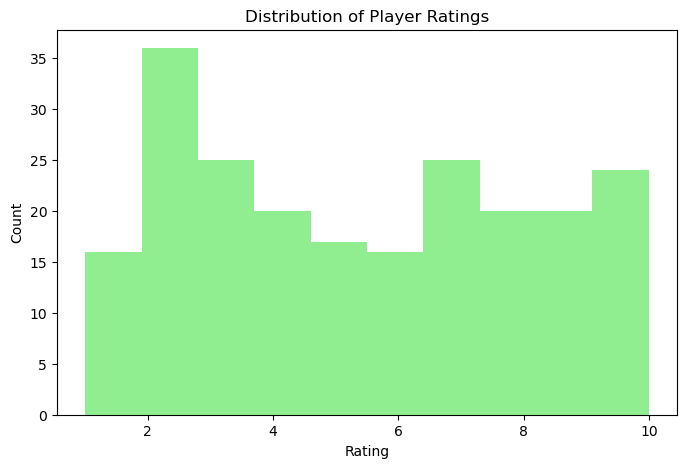

In [99]:
plt.figure(figsize=(8,5))
plt.hist(df4['rating'], bins=10,color="lightgreen")
plt.title("Distribution of Player Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()